In [1]:
import pandas as pd
import analysis_and_plots  as ap

In [2]:

# Define the index
index_depenses = [
    "Loyer", "Restaurant", "Telephone", "Shopping", "Coffee",
    "Transports", "Electricte", "Netflix", "Divers Amazon", "Salle de sport",
    "Divers", "Autres"
]

index_revenus = ["Salaire"]

# Load the Excel file
file_path = 'CFF.xlsx'
sheet_name = 'CFF'

tables = ap.get_tables_from_sheet(file_path, sheet_name)


revenus = tables[0]
depenses = tables[2]














In [3]:
revenus

,Date,2024-08-01 00:00:00,2024-08-08 00:00:00,2024-08-15 00:00:00,2024-08-22 00:00:00,2024-08-29 00:00:00,2024-09-05 00:00:00,2024-09-12 00:00:00,2024-09-19 00:00:00,2024-09-26 00:00:00,...,2024-11-21 00:00:00,2024-11-28 00:00:00,2024-12-05 00:00:00,2024-12-12 00:00:00,2024-12-19 00:00:00,2024-12-26 00:00:00,2025-01-02 00:00:00,2025-01-09 00:00:00,2025-01-16 00:00:00,2025-01-23 00:00:00
0,REVENUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Salaire,3500.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,3500.0,...,3500.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,NaN,NaN
2,Vente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
depenses

,Date,2024-08-01 00:00:00,2024-08-08 00:00:00,2024-08-15 00:00:00,2024-08-22 00:00:00,2024-08-29 00:00:00,2024-09-05 00:00:00,2024-09-12 00:00:00,2024-09-19 00:00:00,2024-09-26 00:00:00,...,2024-11-21 00:00:00,2024-11-28 00:00:00,2024-12-05 00:00:00,2024-12-12 00:00:00,2024-12-19 00:00:00,2024-12-26 00:00:00,2025-01-02 00:00:00,2025-01-09 00:00:00,2025-01-16 00:00:00,2025-01-23 00:00:00
7,DEPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Loyer,1200.00,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,...,1200.0,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,NaN
9,Restaurant,60.00,60.0,NaN,70.0,70.0,60.00,NaN,70.0,70.0,...,70.0,70.0,NaN,NaN,70.0,70.0,NaN,NaN,70.0,70.0
10,Telephone,NaN,30.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,NaN,NaN,30.0,NaN,NaN
11,Shopping,210.00,180.0,120.0,130.0,200.0,140.00,100.0,120.0,180.0,...,120.0,180.0,210.00,100.0,120.0,180.0,210.00,100.0,120.0,180.0
12,Coffee,5.00,5.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,...,NaN,NaN,5.00,5.0,NaN,NaN,5.00,5.0,NaN,NaN
13,Transports,NaN,50.0,50.0,50.0,50.0,50.00,50.0,50.0,50.0,...,50.0,100.0,NaN,NaN,50.0,100.0,NaN,NaN,50.0,100.0
14,Electricte,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,60.0,...,NaN,60.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN,60.0
15,Netflix,15.99,NaN,NaN,NaN,NaN,15.99,NaN,NaN,NaN,...,NaN,NaN,15.99,NaN,NaN,NaN,15.99,NaN,NaN,NaN
16,Divers Amazon,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,NaN,120.0,NaN,NaN


In [5]:
df_revenus = ap.preprocessing(revenus)
df_depense = ap.preprocessing(depenses)


In [6]:
df_revenus

,2024-08-01,2024-08-08,2024-08-15,2024-08-22,2024-08-29,2024-09-05,2024-09-12,2024-09-19,2024-09-26,2024-10-03,...,2024-11-21,2024-11-28,2024-12-05,2024-12-12,2024-12-19,2024-12-26,2025-01-02,2025-01-09,2025-01-16,2025-01-23
1,3500.0,,,,3500.0,,,,3500.0,,...,3500.0,,,,3500.0,,,,,


In [7]:
df_depense

,2024-08-01,2024-08-08,2024-08-15,2024-08-22,2024-08-29,2024-09-05,2024-09-12,2024-09-19,2024-09-26,2024-10-03,...,2024-11-21,2024-11-28,2024-12-05,2024-12-12,2024-12-19,2024-12-26,2025-01-02,2025-01-09,2025-01-16,2025-01-23
8,1200.0,,,,1200.0,,,,1200.0,,...,1200.0,,,,1200.0,,,,1200.0,
9,60.0,60.0,,70.0,70.0,60.0,,70.0,70.0,60.0,...,70.0,70.0,,,70.0,70.0,,,70.0,70.0
10,,30.0,,,,,30.0,,,,...,,,,30.0,,,,30.0,,
11,210.0,180.0,120.0,130.0,200.0,140.0,100.0,120.0,180.0,290.0,...,120.0,180.0,210.0,100.0,120.0,180.0,210.0,100.0,120.0,180.0
12,5.0,5.0,,,5.0,,5.0,,,5.0,...,,,5.0,5.0,,,5.0,5.0,,
13,,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,100.0,,,50.0,100.0,,,50.0,100.0
14,,,,60.0,,,,,60.0,,...,,60.0,,,,60.0,,,,60.0
15,15.99,,,,,15.99,,,,15.99,...,,,15.99,,,,15.99,,,
16,,120.0,,,,,,,,,...,,,,120.0,,,,120.0,,
17,,,,40.0,,,,40.0,,,...,40.0,,,,40.0,,,,40.0,


In [8]:
dataframe_revenus = ap.create_df(df_revenus,"REVENUS",index_revenus)
dataframe_depenses = ap.create_df(df_depense,"DEPENSES",index_depenses)


In [9]:
dataframe_revenus

,2024-08-01,2024-08-08,2024-08-15,2024-08-22,2024-08-29,2024-09-05,2024-09-12,2024-09-19,2024-09-26,2024-10-03,...,2024-11-21,2024-11-28,2024-12-05,2024-12-12,2024-12-19,2024-12-26,2025-01-02,2025-01-09,2025-01-16,2025-01-23
REVENUS,,,,,,,,,,,,,,,,,,,,,
Salaire,3500.0,,,,3500.0,,,,3500.0,,...,3500.0,,,,3500.0,,,,,


In [10]:
dataframe_depenses

,2024-08-01,2024-08-08,2024-08-15,2024-08-22,2024-08-29,2024-09-05,2024-09-12,2024-09-19,2024-09-26,2024-10-03,...,2024-11-21,2024-11-28,2024-12-05,2024-12-12,2024-12-19,2024-12-26,2025-01-02,2025-01-09,2025-01-16,2025-01-23
DEPENSES,,,,,,,,,,,,,,,,,,,,,
Loyer,1200.0,,,,1200.0,,,,1200.0,,...,1200.0,,,,1200.0,,,,1200.0,
Restaurant,60.0,60.0,,70.0,70.0,60.0,,70.0,70.0,60.0,...,70.0,70.0,,,70.0,70.0,,,70.0,70.0
Telephone,,30.0,,,,,30.0,,,,...,,,,30.0,,,,30.0,,
Shopping,210.0,180.0,120.0,130.0,200.0,140.0,100.0,120.0,180.0,290.0,...,120.0,180.0,210.0,100.0,120.0,180.0,210.0,100.0,120.0,180.0
Coffee,5.0,5.0,,,5.0,,5.0,,,5.0,...,,,5.0,5.0,,,5.0,5.0,,
Transports,,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,100.0,,,50.0,100.0,,,50.0,100.0
Electricte,,,,60.0,,,,,60.0,,...,,60.0,,,,60.0,,,,60.0
Netflix,15.99,,,,,15.99,,,,15.99,...,,,15.99,,,,15.99,,,
Divers Amazon,,120.0,,,,,,,,,...,,,,120.0,,,,120.0,,


In [11]:

total_depenses =  ap.sum_columns(dataframe_depenses)
print(total_depenses)


          Week  Balance
0   2024-08-01  1490.99
1   2024-08-08   445.00
2   2024-08-15   295.00
3   2024-08-22   350.00
4   2024-08-29  1555.00
5   2024-09-05   265.99
6   2024-09-12   310.00
7   2024-09-19   280.00
8   2024-09-26  1590.00
9   2024-10-03   420.99
10  2024-10-10   335.00
11  2024-10-17   325.00
12  2024-10-24  1640.00
13  2024-10-31   230.99
14  2024-11-07   420.99
15  2024-11-14   335.00
16  2024-11-21  1525.00
17  2024-11-28   440.00
18  2024-12-05   230.99
19  2024-12-12   335.00
20  2024-12-19  1525.00
21  2024-12-26   440.00
22  2025-01-02   230.99
23  2025-01-09   335.00
24  2025-01-16  1525.00
25  2025-01-23   440.00


In [12]:
total_revenus = ap.sum_columns(dataframe_revenus)
print(total_revenus)

          Week  Balance
0   2024-08-01   3500.0
1   2024-08-08      0.0
2   2024-08-15      0.0
3   2024-08-22      0.0
4   2024-08-29   3500.0
5   2024-09-05      0.0
6   2024-09-12      0.0
7   2024-09-19      0.0
8   2024-09-26   3500.0
9   2024-10-03      0.0
10  2024-10-10      0.0
11  2024-10-17      0.0
12  2024-10-24   3500.0
13  2024-10-31      0.0
14  2024-11-07      0.0
15  2024-11-14      0.0
16  2024-11-21   3500.0
17  2024-11-28      0.0
18  2024-12-05      0.0
19  2024-12-12      0.0
20  2024-12-19   3500.0
21  2024-12-26      0.0
22  2025-01-02      0.0
23  2025-01-09      0.0
24  2025-01-16      0.0
25  2025-01-23      0.0


In [13]:
df_main = ap.subtract_dataframes(total_revenus,total_depenses)
print(df_main)

          Week  Balance
0   2024-08-01  2009.01
1   2024-08-08  -445.00
2   2024-08-15  -295.00
3   2024-08-22  -350.00
4   2024-08-29  1945.00
5   2024-09-05  -265.99
6   2024-09-12  -310.00
7   2024-09-19  -280.00
8   2024-09-26  1910.00
9   2024-10-03  -420.99
10  2024-10-10  -335.00
11  2024-10-17  -325.00
12  2024-10-24  1860.00
13  2024-10-31  -230.99
14  2024-11-07  -420.99
15  2024-11-14  -335.00
16  2024-11-21  1975.00
17  2024-11-28  -440.00
18  2024-12-05  -230.99
19  2024-12-12  -335.00
20  2024-12-19  1975.00
21  2024-12-26  -440.00
22  2025-01-02  -230.99
23  2025-01-09  -335.00
24  2025-01-16 -1525.00
25  2025-01-23  -440.00


In [14]:
train_data, test_data = ap.train_test_split(df_main, split_index=24)

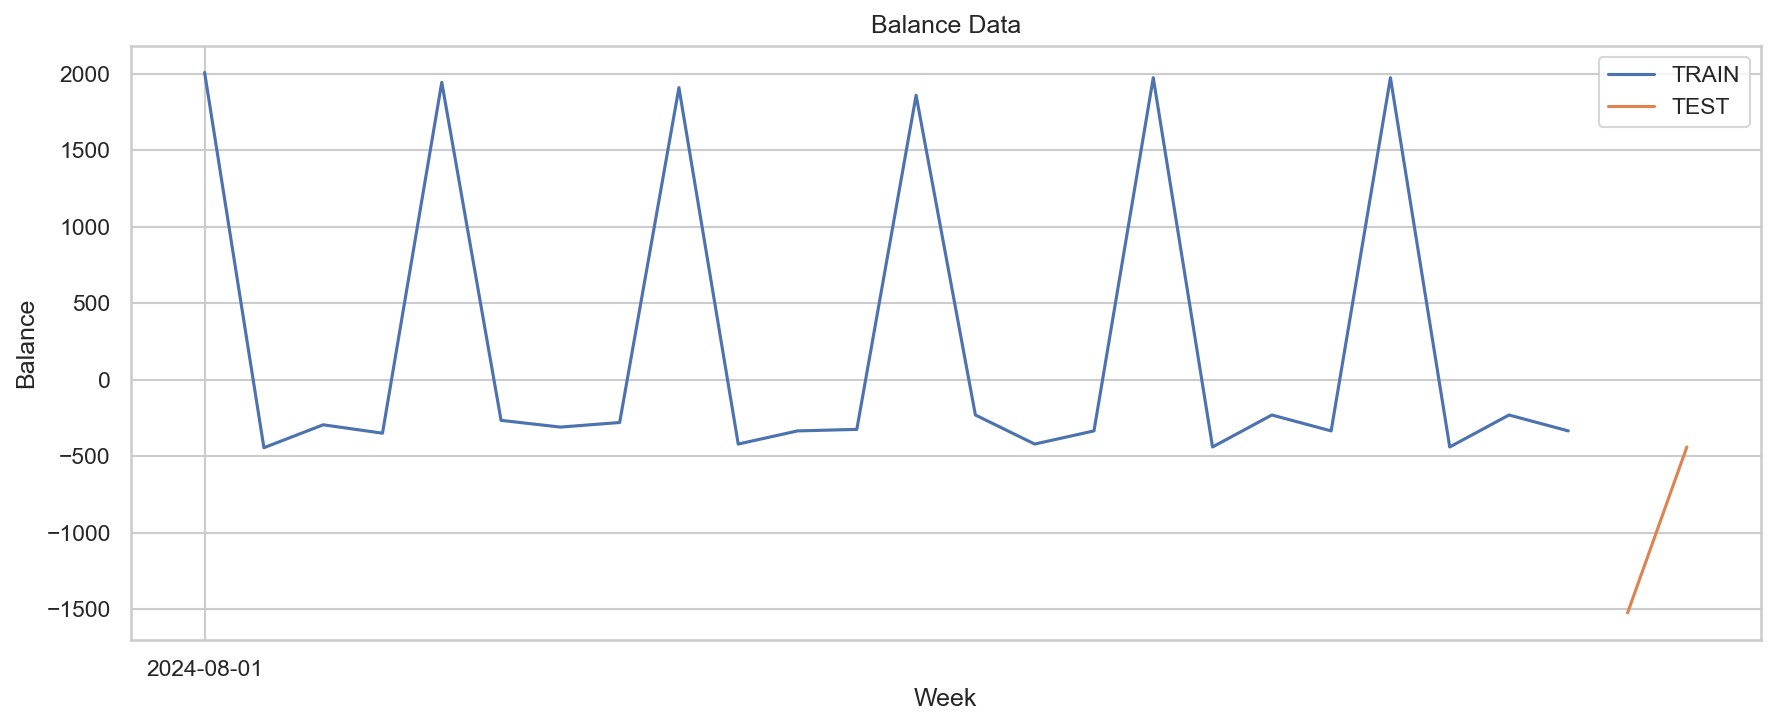

In [15]:
ap.plot_train_test_data(train_data=train_data, test_data=test_data)

**Triple explonential smoohting model fit**

In [17]:
preds_triple = ap.exp_smoothing_model(train_data, test_data, model='triple')

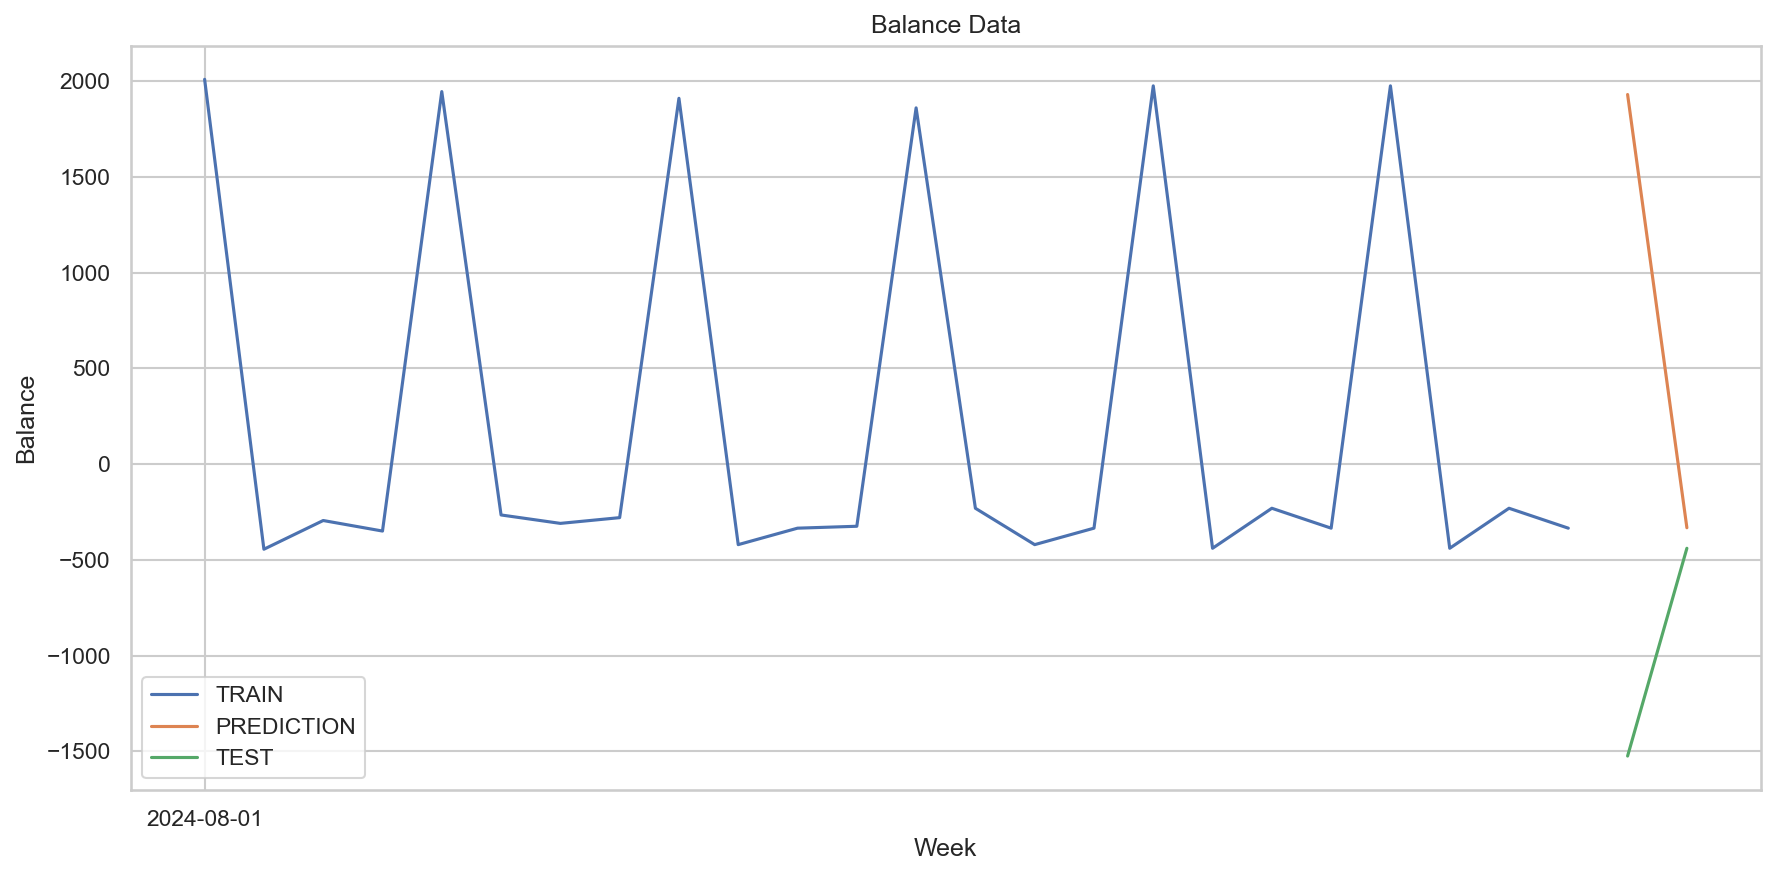

In [18]:
ap.exponential_smoothing_plot(train_data, test_data, preds_triple)

In [19]:
triple_rms = ap.rms_error_calc(test_data, preds_triple)
print(" Root Mean Square Error of triple exponential method is:", triple_rms)

 Root Mean Square Error of triple exponential method is: 2444.06173463665


In [20]:
# Charger le modèle pré-entraîné
loaded_model = ap.load_model(filename='trained_exp_smoothing_model.pkl')

# Charger les données du client (nouvelle DataFrame avec la colonne 'Week' et 'Balance')
new_client_data = pd.DataFrame({
    'Week': pd.date_range(start='2025-01-01', periods=10, freq='W'),
    'Balance': [2009.01 	,-445.00	,-295.00	,-350.00 ,	1945.00  	,-265.99, 2009.01 	,-445.00	,-295.00	,-350.00]
})

# Prédire sur plusieurs semaines pour le nouveau client
predictions = ap.predict_with_model(loaded_model, new_client_data, weeks_ahead=4)

flux_forecast = []

flux_forecast = predictions['Predicted_Balance']


forecast_balance = ap.cumulative_addition(flux_forecast,1564.01)

print(forecast_balance)


[3493.7712592845846, 3161.0100898293776, 2798.201696606935, 2454.511213220051]


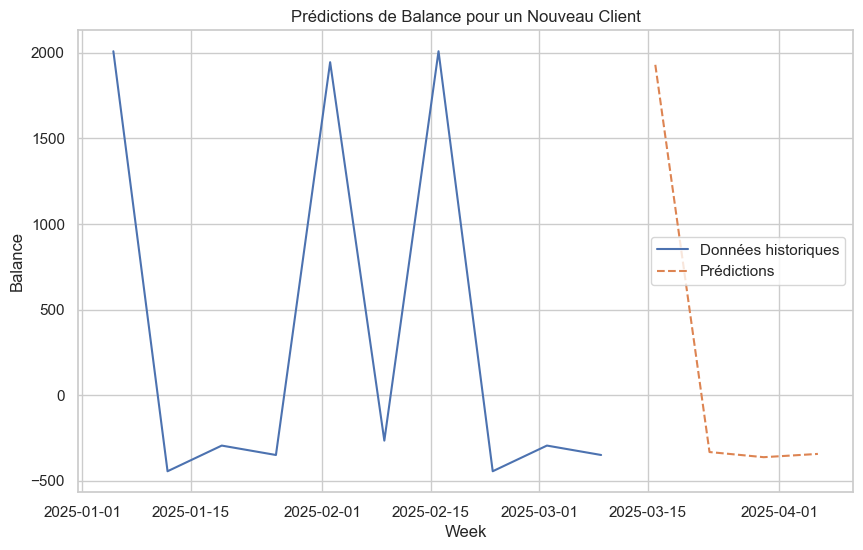

In [21]:
import matplotlib.pyplot as plt

# Visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.plot(new_client_data['Week'], new_client_data['Balance'], label='Données historiques')
plt.plot(predictions['Week'], predictions['Predicted_Balance'], label='Prédictions', linestyle='--')
plt.xlabel('Week')
plt.ylabel('Balance')
plt.title('Prédictions de Balance pour un Nouveau Client')
plt.legend()
plt.show()
